# Multivariate Resemblance Analysis (MRA) Dataset E

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/E_PimaIndiansDiabetes_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/E_PimaIndiansDiabetes_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/E_PimaIndiansDiabetes_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/E_PimaIndiansDiabetes_Synthetic_WGANGP.csv'}
categorical_columns = ['Outcome']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              2       84              0              0        0   0.0   
 1              9      112             82             24        0  28.2   
 2              1      139             46             19       83  28.7   
 3              0      161             50              0        0  21.9   
 4              6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 609            5      139             64             35      140  28.6   
 610            1       96            122              0        0  22.4   
 611           10      101             86             37        0  45.6   
 612            0      141              0              0        0  42.4   
 613            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age Outcome  
 0                       0.304   21       0 

## 2. Plot PPC matrixes and calculate matrixes norms

In [5]:
#compute correlation matrixes for all datasets
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])
norms_numerical

{'Real': 3.2477,
 'GM': 3.1542,
 'SDV': 3.2412,
 'CTGAN': 2.8529,
 'WGANGP': 4.3979}

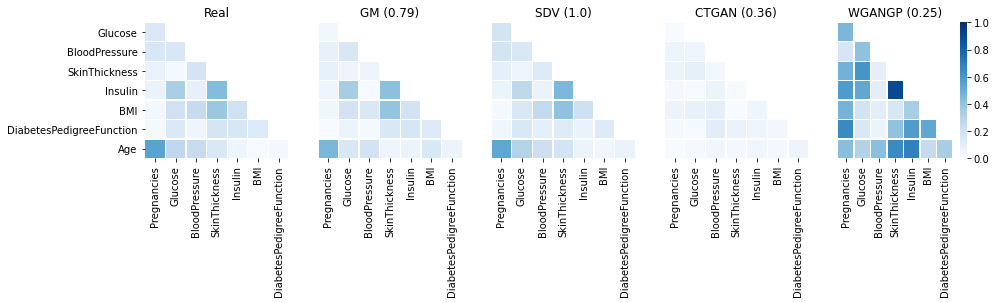

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])  
        
    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [7]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': nan, 'GM': nan, 'SDV': nan, 'CTGAN': nan, 'WGANGP': nan}

ZeroDivisionError: division by zero

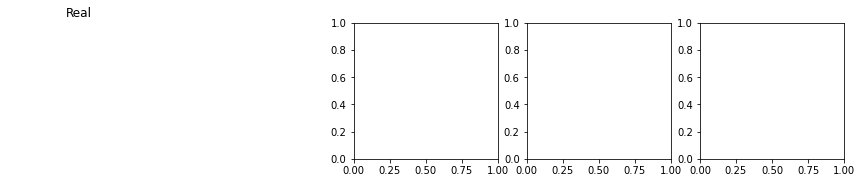

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_categorical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [9]:
norms_numerical

{'Real': 3.2477,
 'GM': 3.1542,
 'SDV': 3.2412,
 'CTGAN': 2.8529,
 'WGANGP': 4.3979}

In [10]:
norms_categorical

{'Real': nan, 'GM': nan, 'SDV': nan, 'CTGAN': nan, 'WGANGP': nan}

In [11]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_csv('MULTIVARIATE RESEMBLANCE RESULTS/Correlation_Matrix_Norms.csv')
df_norms

,Real,GM,SDV,CTGAN,WGANGP
PPC_MATRIX_NORMS,3.2477,3.1542,3.2412,2.8529,4.3979
CATEGORICAL_CORS_MATRIX_NORMS,NaN,NaN,NaN,NaN,NaN
